# TP d'acceptation-rejet # 
 

# APPLICATION  D'UNE METHODE D'ACCEPTATION-REJET POUR UNE SIMULATION BAYESIENNE A POSTERIORI


Donnees X  ~ Loi NORMALE (THETA,1). La derniere donnee observee est censuree a droite.  
A priori sur THETA = Loi NORMALE (MU,1) d'hyperparametre MU.

In [1]:
%matplotlib notebook
from scipy import log, pi, exp, sqrt
from scipy import __version__ as sci_version
from scipy.stats import norm
from numpy.random import normal, uniform
from statistics import mean
from matplotlib import __version__ as mpl_version
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(
      "scipy version " +  sci_version + 
      "\nnumpy version " + np.__version__ +
      "\nmatplotlib version " + mpl_version 
     )

scipy version 1.3.1
numpy version 1.16.0
matplotlib version 3.1.1


## Jeu de données 

15 donnees simulees selon la loi NORMALE (0,1), la derniere donnee est censuree a droite.

In [3]:
data = [ 0.8114032, -0.4631576, -0.5984133,  1.5006175, 
        0.2123149, -1.0101033,1.0199253, -2.5994554,
        -0.3684774,  0.8263161,  0.4572680, -0.7240380,
        -0.3134977, -0.3772193, 1.64]

##        Algorithme d'Acceptation-Rejet

Produire l'algorithme d'acceptation-rejet à partir des éléments ci-dessous

### Densité de la loi a priori sur theta

Définir la log-densité et la densité a priori sur theta


In [4]:
def gaussian_log_prior(theta, mu = 0) :
    # La variance est fixee a 1
    return - (1 / 2) * log(2 * pi) - (1 / 2) * (theta - mu) ** 2

def gaussian_prior_density(theta, mu = 0) :
    return exp(gaussian_log_prior(theta, mu))

### Densité de la loi a posteriori sur theta (définie a un facteur près)

Définir de la même façon la log-densité puis la densité de la loi a posteriori sur theta

In [5]:
def log_posterior(data, theta, mu_post = 0, sigma_post = 1) :
    # Terme gaussien regulier
    ll1 = - (1 / (2 * sigma_post ** 2)) * (theta - mu_post) ** 2
    # Terme lie a la censure
    ll2 = log(1 - norm(loc = 0, scale = 1).cdf(data[-1:][0] - theta))
    return ll1 + ll2

### Densité de la loi instrumentale

Faisons de même pour la loi instrumentale choisie....

In [6]:
def log_instrumental(theta, mean, sigma) :
    return - (1/2) * log(2 * pi) - log(sigma) - (1/(2 * sigma ** 2)) * (theta - mean)** 2

def density_instrumental(theta, mean, sigma) :
    return exp(log_instrumental(theta, mean, sigma))

### Algorithme d'Acceptation-Rejet

Mettons à présent en place l'algorithme d'acceptation-rejet
Lorsque les tirages sont obtenus, on cherche à valider que ceux-ci suivent bien la loi-cible
en calculant la constante d'intégration et en retraçant la densité pour la superposer à l'histogramme des tirages

Voici les paramètres "désirés" de cette fonction générale à écrire : 
    
N = nombre de tirages desires a posteriori  
mu = moyenne a priori pour X  
option = 1 : tirage instrumental dans la loi a posteriori en "oubliant" la donnee censuree  
option = 2 : tirage instrumental dans la loi a priori  


In [7]:
def acceptation_rejet(data, option = 1, N = 5000, mu = 0) :
    
    # Initialisation
    theta_accepted = []
    theta_refused = []
    prop_accepted = []
    n_samples = int(round(N / 100 + 1))
    n_iter = 0
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
    
    n = len(data)
    mean_post  = (mu + sum(data[:-1])) / n 
    sigma_post = sqrt(1/n)
    space = np.linspace(-4,4,60)
    
    # Application de l'option
    if option == 1 :
        m = mean_post
        sigma = sigma_post
        K = sqrt(2 * pi / n)
    if option == 2 :
        m = mu
        sigma = 1
        K = sqrt(2 * pi) * exp( 0.5 *((mean(data[:-1]) - mu) ** 2) * ( 1 - sqrt(n)))
     
    # Boucle d'acceptation - rejet
    while len(theta_accepted) < N :
        
        n_iter += 1
        theta = normal(m, sigma, n_samples) # Tirage instrumental
        U = uniform(0, 1, n_samples)        # Tirage uniforme
        
        # log_post = ...
        # log_inst = ...
        
        # Test
        # test = 
        
       # theta_accepted = ...
       # theta_refused = ...
       # prop_accepted = ...
        
        # Calculer la constante de normalisation
        prob_acceptation = len(theta_accepted)/(len(theta_accepted) + len(theta_refused))
        C = 1 / (K * (prob_acceptation if prob_acceptation > 0 else 0.00001))
        
        # Plotter les resultats
        ax1.cla()
        ax2.cla()
        ax1.plot(range(n_iter), prop_accepted)
        ax1.relim()
        ax1.set_title("Proportion d'acceptation")
        ax1.set_xlabel("Iteration")
        ax1.set_ylabel("Proportion d'acceptation")
        ax2.hist(theta_accepted, density = True, bins = max(1, min(int(len(theta_accepted)/3), 30)))
        #ax2.plot(space, [density_instrumental(x, m, sigma) for x in space], color = "orange", ls = "-",
         #       label = "Distribution instrumentale")
        ax2.plot(space, [gaussian_prior_density(x) for x in space], color = "green", ls = "--",
                label = "Distribution a priori")
        ax2.plot(space, [C * exp(log_posterior(data, x, mean_post, sigma_post)) for x in space], 
                 color = "red", ls = "--", label = "Distribution a posteriori")
        ax2.relim()
        ax2.set_title("Histogramme des simulations acceptees")
        ax2.set_xlabel("Theta")
        ax2.set_ylabel("Densite")
        ax2.legend()
        fig.canvas.draw()      
           
    return theta_accepted

<IPython.core.display.Javascript object>


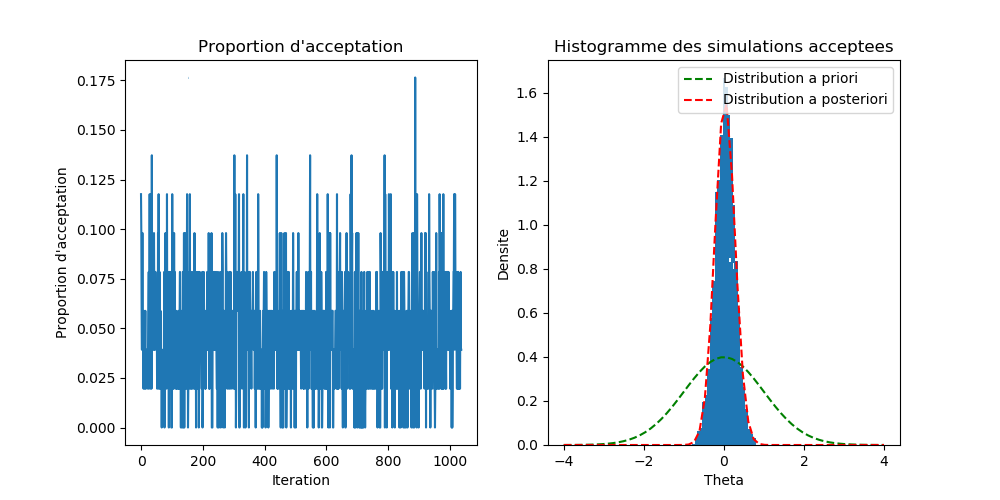

In [ ]:
acceptation_rejet(data, option = 1, N = 5000, mu = 0)